# Traveling Salesman Problem (TSP)
details: https://en.wikipedia.org/wiki/Travelling_salesman_problem

In [1]:
import pandas as pd
import numpy as np
import math

### Load the data

In [2]:
df=pd.DataFrame()
df['x']=[27,30,43,58,58,37,38,46,61,62,63,32,45,59,5,10,21,5,30,39,32,25,25,48,56,30,37,49,52,20,40,21,17,31,52,51,42,31,5,12,36,52,27,17,13,57,62,42,16,8,7]
df['y']=[68,48,67,48,27,69,46,10,33,63,69,22,35,15,6,17,10,64,15,10,39,32,55,28,37,40,52,49,64,26,30,47,63,62,33,21,41,32,25,42,16,41,23,33,13,58,42,57,57,52,38]
N=df.shape[0]
N

51

In [3]:
df.head()

,x,y
0,27,68
1,30,48
2,43,67
3,58,48
4,58,27


The data has 51 data points, and each data point is x,y coordinate of a city

### View the Cities on a graph

In [4]:
import matplotlib.pyplot as plt

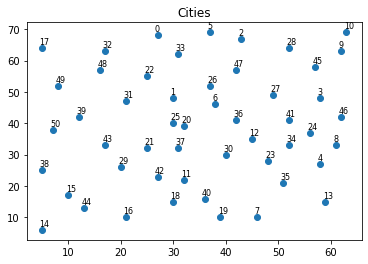

In [5]:
plt.scatter(df.x,df.y)
plt.title("Cities")
for City_ID in range(N):
    plt.annotate(City_ID, (df.x[City_ID]-0.5, df.y[City_ID]+1.2),size=8)
plt.show()

### Objective: find a shortest path that
1. starts from a city
2. visit all city once
3. come back to the city started in 1

### Define state (path)

$$
S=[C_0,C_1,...,C_{N-1},C_0]
$$

where $C_i$ is a city on that path, i=0,1,2,...,N-1. Also, |S|=N+1 (as we need to go back to where we started).

### How to evaluate a given path:
$$
D=\sum_{i=0}^{N-2}\sqrt{(x_i-x_{i+1})^2+(y_i-y_{i+1})^2}+\sqrt{(x_{N-1}-x_{0})^2+(y_{N-1}-y_{0})^2}
$$

$\sum_{i=0}^{N-2}\sqrt{(x_i-x_{i+1})^2+(y_i-y_{i+1})^2}$: the total distance from $[C_0,...,C_{N-1}]$

$\sqrt{(x_{N-1}-x_{0})^2+(y_{N-1}-y_{0})^2}$: the distance from $C_{N-1}$ to $C_0$ (where the salesman started)

D: total distance of the path

# Genetic Algorithm
$$Chromosome=[C_0,C_1,...,C_{N-1}]$$

# badness function

In [6]:
def badness(gene,data=df):
    D=0
    N=data.shape[0]
    for idx in range(N-1):
        D+=np.sqrt((data.loc[gene[idx],'x']-data.loc[gene[idx+1],'x'])**2+(data.loc[gene[idx],'y']-data.loc[gene[idx+1],'y'])**2)
    D+=np.sqrt((data.loc[gene[-1],'x']-data.loc[gene[0],'x'])**2+(data.loc[gene[-1],'y']-data.loc[gene[0],'y'])**2)
    return D

In [7]:
np.random.seed(1)
gene=list(np.random.choice(range(N),size=N,replace=False))

In [8]:
badness(gene)

1573.2516379726624

# mutation

In [9]:
def mutation(input_gene):
    gene=input_gene[:]
    N=len(gene)
    idx1,idx2=np.random.choice(range(N-1),size=2,replace=False)
    mutated_part=gene[min(idx1,idx2):max(idx1,idx2)+1]
    mutated_part.reverse()
    gene[min(idx1,idx2):max(idx1,idx2)+1]=mutated_part
    return gene

In [10]:
print(gene,badness(gene))
new_gene=mutation(gene)
print(new_gene,badness(new_gene))

[22, 2, 49, 26, 33, 44, 30, 50, 32, 27, 3, 29, 47, 41, 39, 21, 40, 38, 19, 24, 13, 42, 17, 46, 36, 23, 4, 34, 14, 31, 10, 28, 45, 35, 18, 20, 25, 6, 7, 48, 1, 16, 0, 15, 5, 11, 9, 8, 12, 43, 37] 1573.2516379726624
[22, 2, 49, 26, 33, 44, 30, 50, 32, 27, 3, 29, 47, 41, 39, 21, 40, 38, 19, 24, 31, 14, 34, 4, 23, 36, 46, 17, 42, 13, 10, 28, 45, 35, 18, 20, 25, 6, 7, 48, 1, 16, 0, 15, 5, 11, 9, 8, 12, 43, 37] 1594.1834512260955


# crossover

In [11]:
def single_point_crossover(input_gene1,input_gene2):
    gene1=input_gene1[:]
    gene2=input_gene2[:]
    crossover_point=np.random.randint(1,len(gene1)-1)
    part2_gene1=gene1[crossover_point:]
    part2_gene2=gene2[crossover_point:]

    for c in part2_gene1:
        gene2.remove(c)
    new_gene2=gene2+part2_gene1
    for c in part2_gene2:
        gene1.remove(c)
    new_gene1=gene1+part2_gene2
    return new_gene1,new_gene2

In [12]:
gene1=list(np.random.choice(range(N),size=N,replace=False))
gene2=list(np.random.choice(range(N),size=N,replace=False))
print(gene1,gene2,badness(gene1),badness(gene2))
new_gene1,new_gene2=single_point_crossover(gene1,gene2)
print(new_gene1,new_gene2,badness(new_gene1),badness(new_gene2))

[34, 3, 45, 5, 33, 40, 31, 39, 14, 44, 48, 29, 16, 26, 15, 22, 47, 19, 9, 1, 38, 0, 37, 36, 24, 25, 35, 17, 28, 23, 10, 41, 32, 18, 4, 42, 30, 20, 46, 43, 8, 13, 7, 11, 49, 27, 12, 2, 50, 21, 6] [44, 12, 1, 35, 26, 11, 38, 36, 23, 3, 50, 0, 29, 16, 46, 18, 28, 17, 31, 8, 47, 4, 5, 39, 7, 2, 9, 30, 15, 27, 24, 34, 6, 43, 45, 14, 40, 19, 41, 21, 25, 32, 10, 49, 33, 13, 37, 22, 48, 20, 42] 1576.6476330526677 1691.5939154105783
[34, 3, 5, 31, 39, 44, 29, 16, 26, 15, 47, 9, 1, 38, 0, 36, 24, 35, 17, 28, 23, 18, 4, 30, 46, 43, 8, 7, 11, 27, 12, 2, 50, 6, 45, 14, 40, 19, 41, 21, 25, 32, 10, 49, 33, 13, 37, 22, 48, 20, 42] [44, 1, 35, 26, 38, 36, 23, 3, 0, 29, 16, 18, 28, 17, 31, 47, 5, 39, 9, 15, 24, 34, 45, 14, 40, 19, 41, 25, 32, 10, 33, 37, 22, 48, 4, 42, 30, 20, 46, 43, 8, 13, 7, 11, 49, 27, 12, 2, 50, 21, 6] 1569.454471113047 1602.9371919283267


# generate the initial population

In [13]:
def populate(k,N):
    return [list(np.random.choice(range(N),size=N,replace=False)) for _ in range(k)]

In [14]:
population=populate(50,N)

# putting everything together

In [15]:
k=50
prob_crossover=0.5
prob_mutation=0.3
population=populate(k,N)
result_logs=[]
for epoch in range(500):
    new_population=[]
    for idx,gene in enumerate(population):
        if np.random.random()<=prob_crossover:
            index_list=list(range(k))
            index_list.remove(idx)
            gene2_idx=np.random.choice(index_list,size=1)[0]
            gene2=population[gene2_idx]
            gene,gene2=gene[:],gene2[:]
            new_gene1,new_gene2=single_point_crossover(gene,gene2)
            if np.random.random()<=prob_mutation:
                new_gene1=mutation(new_gene1)
            if np.random.random()<=prob_mutation:
                new_gene2=mutation(new_gene2)                
            new_population.append(new_gene1)
            new_population.append(new_gene2)
        elif np.random.random()<=prob_mutation:
            new_gene=mutation(gene)     
            new_population.append(new_gene)
    population+=new_population
    population=sorted(population,key=badness)[:k]
    result_logs.append(badness(population[0]))    

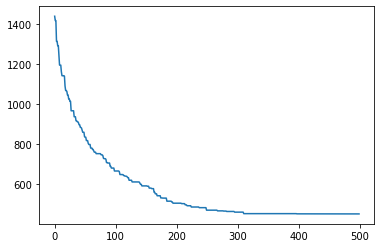

In [16]:
plt.plot(result_logs)
plt.show()

In [17]:
best_gene=population[0]

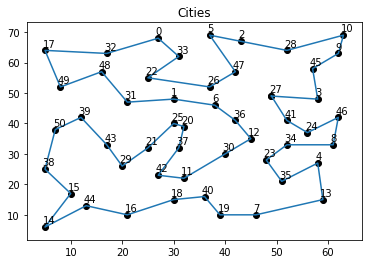

path: [27, 41, 24, 46, 8, 34, 23, 35, 4, 13, 7, 19, 40, 18, 16, 44, 14, 15, 38, 50, 39, 43, 29, 21, 25, 20, 37, 42, 11, 30, 12, 36, 6, 1, 31, 48, 49, 17, 32, 0, 33, 22, 26, 47, 5, 2, 28, 10, 9, 45, 3, 27]
the cost is 453.0472388735279


In [18]:
state=best_gene[:]+[best_gene[0]]
plt.plot(df.loc[state,'x'],df.loc[state,'y'])
plt.scatter(df.loc[state,'x'],df.loc[state,'y'],color="black")
plt.title("Cities")
for City_ID in range(N):
    plt.annotate(City_ID, (df.x[City_ID]-0.5, df.y[City_ID]+1.2))
plt.show()
print("path:",state)
cost=badness(best_gene,df)
print("the cost is {}".format(cost))